# DataFrames II: Filtering Data

In [1]:
import pandas as pd

## This Module's Dataset + Memory Optimization
- The `pd.to_datetime` method converts a **Series** to hold datetime values.
- The `format` parameter informs pandas of the format that the times are stored in.
- We pass symbols designating the segments of the string. For example, %m means "month" and %d means day.
- The `dt` attribute reveals an object with many datetime-related attributes and methods.
- The `dt.time` attribute extracts only the time from each value in a datetime **Series**.
- Use the `astype` method to convert the values in a **Series** to another type.
- The `parse_dates` parameter of `read_csv` is an alternate way to parse strings as datetimes.

In [61]:
employee = pd.read_csv("employees.csv") # import empoyee dataset 
employee.head(2)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN


In [62]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [63]:
employee['Start Date'] = pd.to_datetime(employee["Start Date"],format="%m/%d/%Y") # use format to customize your date time 

In [64]:
employee.head(3)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance


In [65]:
employee['Last Login Time'] = pd.to_datetime(employee['Last Login Time'],format= "%H:%M %p").dt.time # if you have time also you can customize it 

In [66]:
employee.head(2)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN


In [67]:
employee['Senior Management'] = employee['Senior Management'].astype(bool)

In [68]:
employee.head(2)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN


In [69]:
employee['Gender'] =employee['Gender'].astype('category')

In [70]:
employee.head(1)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing


In [71]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    category      
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   object        
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  1000 non-null   bool          
 7   Team               957 non-null    object        
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 49.1+ KB


In [82]:
# if you prefer this way, we can use parse_dates,date_format 
# employee = pd.read_csv("employees.csv",parse_dates=['Start Date'],date_format="%m/%d/%Y") 
# employee['Last Login Time'] = pd.to_datetime(employee['Last Login Time'],format= "%H:%M %p").dt.time
# employee['Senior Management'] = employee['Senior Management'].astype(bool)
# employee['Gender'] =employee['Gender'].astype('category')
# employee.head(3)

## Filter A DataFrame  Based On A Condition
- Pandas needs a **Series** of Booleans to perform a filter.
- Pass the Boolean Series inside square brackets after the **DataFrame**.
- We can generate a Boolean Series using a wide variety of operations (equality, inequality, less than, greater than, inclusion, etc)

In [5]:
employees = pd.read_csv("employees.csv",parse_dates=['Start Date'],date_format="%m/%d/%Y") 
employees['Last Login Time'] = pd.to_datetime(employees['Last Login Time'],format= "%H:%M %p").dt.time
employees['Senior Management'] = employees['Senior Management'].astype(bool)
employees['Gender'] =employees['Gender'].astype('category')
employees.head(1)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing


In [89]:
employees[employees['Gender'] =="Male"] # Filter Gender 

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,04:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,01:35:00,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,2013-06-21,05:47:00,98874,4.479,True,Marketing
996,Phillip,Male,1984-01-31,06:30:00,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,12:39:00,96914,1.421,False,Product
998,Larry,Male,2013-04-20,04:45:00,60500,11.985,False,Business Development


In [105]:
employees[employees['Team'] =='Finance'].head() # Filter By Finance 

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
7,NaN,Female,2015-07-20,10:43:00,45906,11.598,True,Finance
14,Kimberly,Female,1999-01-14,07:13:00,41426,14.543,True,Finance
46,Bruce,Male,2009-11-28,10:47:00,114796,6.796,False,Finance


In [104]:
finance_team = employees['Team'] =="Finance"
employees[finance_team].head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
7,NaN,Female,2015-07-20,10:43:00,45906,11.598,True,Finance
14,Kimberly,Female,1999-01-14,07:13:00,41426,14.543,True,Finance
46,Bruce,Male,2009-11-28,10:47:00,114796,6.796,False,Finance


In [103]:
employees[employees['Senior Management']].head(2) # because we already conver Senior Managemenet to bool

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN


In [110]:
employees[employees["Bonus %"] < 6.945].head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN
4,Larry,Male,1998-01-24,04:47:00,101004,1.389,True,Client Services
13,Gary,Male,2008-01-27,11:40:00,109831,5.831,False,Sales
15,Lillian,Female,2016-06-05,06:09:00,59414,1.256,False,Product
17,Shawn,Male,1986-12-07,07:45:00,111737,6.414,False,Product


In [118]:
employees[employees["Start Date"] > "1993-08-06"].head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,04:47:00,101004,1.389,True,Client Services
7,NaN,Female,2015-07-20,10:43:00,45906,11.598,True,Finance
8,Angela,Female,2005-11-22,06:29:00,95570,18.523,True,Engineering


In [120]:
# for time we need to import time module
import datetime as dt
dt.time(12,0,0)

datetime.time(12, 0)

In [123]:
employees[employees["Last Login Time"] < dt.time(12,0,0)]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,04:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,01:35:00,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,2013-06-21,05:47:00,98874,4.479,True,Marketing
995,Henry,NaN,2014-11-23,06:09:00,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,06:30:00,42392,19.675,False,Finance
998,Larry,Male,2013-04-20,04:45:00,60500,11.985,False,Business Development


## Filter with More than One Condition (AND)
- Add the `&` operator in between two Boolean **Series** to filter by multiple conditions.
- We can assign the **Series** to variables to make the syntax more readable.

In [151]:
is_female = employees['Gender'] == 'Female' 
finance_team = employees['Team'] =='Finance'
employees[is_female & finance_team]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Female,2005-03-04,01:00:00,138705,9.340,True,Finance
7,NaN,Female,2015-07-20,10:43:00,45906,11.598,True,Finance
14,Kimberly,Female,1999-01-14,07:13:00,41426,14.543,True,Finance
46,Bruce,Female,2009-11-28,10:47:00,114796,6.796,False,Finance
...,...,...,...,...,...,...,...,...
907,Elizabeth,Female,1998-07-27,11:12:00,137144,10.081,False,Finance
954,Joe,Female,1980-01-19,04:06:00,119667,1.148,True,Finance
987,Gloria,Female,2014-12-08,05:08:00,136709,10.331,True,Finance
992,Anthony,Female,2011-10-16,08:35:00,112769,11.625,True,Finance


In [191]:
# female employees who work in marking who earn over $200 a year
is_female =employees['Gender'] == 'Female'
is_finance = employees['Team'] == 'Finance'
earn_200 = employees['Salary'] > 20000
employees[is_female & is_finance & earn_200] # if exist data found will show down
# is_marking

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Female,2005-03-04,01:00:00,138705,9.340,True,Finance
7,NaN,Female,2015-07-20,10:43:00,45906,11.598,True,Finance
14,Kimberly,Female,1999-01-14,07:13:00,41426,14.543,True,Finance
46,Bruce,Female,2009-11-28,10:47:00,114796,6.796,False,Finance
...,...,...,...,...,...,...,...,...
907,Elizabeth,Female,1998-07-27,11:12:00,137144,10.081,False,Finance
954,Joe,Female,1980-01-19,04:06:00,119667,1.148,True,Finance
987,Gloria,Female,2014-12-08,05:08:00,136709,10.331,True,Finance
992,Anthony,Female,2011-10-16,08:35:00,112769,11.625,True,Finance


## Filter with More than One Condition (OR)
- Use the `|` operator in between two Boolean **Series** to filter by *either* condition.

In [202]:
first_name =employees['First Name'] =='Thomas' 
salary = employees['Salary'] > 10000
employees[first_name]
employees[first_name | salary]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Female,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Female,1996-03-31,06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Female,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Female,1998-01-24,04:47:00,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,Female,2014-11-23,06:09:00,132483,16.655,False,Distribution
996,Phillip,Female,1984-01-31,06:30:00,42392,19.675,False,Finance
997,Russell,Female,2013-05-20,12:39:00,96914,1.421,False,Product
998,Larry,Female,2013-04-20,04:45:00,60500,11.985,False,Business Development


In [213]:
bonus = employees["Bonus %"] > 19.675
is_female = employees["Gender"] =="Female"
employees[bonus | is_female]
employees[bonus & is_female]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
136,Henry,Female,1995-04-24,04:18:00,43542,19.687,False,Legal
150,Sean,Female,1996-05-04,08:59:00,135490,19.934,False,Marketing
335,Robert,Female,2014-11-18,05:00:00,85799,19.930,False,Finance
348,Philip,Female,1989-08-02,11:21:00,129968,19.897,False,Finance
372,Albert,Female,1997-02-01,04:20:00,67827,19.717,True,Engineering
387,Robert,Female,1994-10-29,04:26:00,123294,19.894,False,Client Services
450,Willie,Female,2009-08-22,01:03:00,55038,19.691,False,Legal
488,Robert,Female,2007-03-11,11:20:00,135882,19.944,False,Legal
489,Sharon,Female,2011-07-01,09:50:00,46007,19.731,True,Client Services
512,Wanda,Female,1993-04-06,03:11:00,78883,19.695,False,NaN


## The isin Method
- The `isin` **Series** method accepts a collection object like a list, tuple, or **Series**.
- The method returns True for a row if its value is found in the collection.

In [230]:
is_marking = employees['Team'] == 'Marking'
is_finance = employees['Team']  =='Finance'
is_sales = employees['Team'] == 'Sales'

employees[is_marking | is_finance | is_sales]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Female,2005-03-04,01:00:00,138705,9.340,True,Finance
7,NaN,Female,2015-07-20,10:43:00,45906,11.598,True,Finance
13,Gary,Female,2008-01-27,11:40:00,109831,5.831,False,Sales
14,Kimberly,Female,1999-01-14,07:13:00,41426,14.543,True,Finance
...,...,...,...,...,...,...,...,...
975,Susan,Female,1995-04-07,10:05:00,92436,12.467,False,Sales
987,Gloria,Female,2014-12-08,05:08:00,136709,10.331,True,Finance
992,Anthony,Female,2011-10-16,08:35:00,112769,11.625,True,Finance
996,Phillip,Female,1984-01-31,06:30:00,42392,19.675,False,Finance


In [238]:
# we can do the above code is simple way using isin
sales_team = employees['Team'].isin(["Marketing","Sales","Finance"])
employees[sales_team].head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Female,1993-08-06,12:42:00,97308,6.945,True,Marketing
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Female,2005-03-04,01:00:00,138705,9.340,True,Finance
7,NaN,Female,2015-07-20,10:43:00,45906,11.598,True,Finance
13,Gary,Female,2008-01-27,11:40:00,109831,5.831,False,Sales


## The isnull and notnull Methods
- The `isnull` method returns True for `NaN` values in a **Series**.
- The `notnull` method returns True for present values in a **Series**.

In [247]:
employees[employees['Team'].isnull()]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Female,1996-03-31,06:53:00,61933,4.170,True,NaN
10,Louise,Female,1980-08-12,09:01:00,63241,15.132,True,NaN
23,NaN,Female,2012-06-14,04:19:00,125792,5.042,True,NaN
32,NaN,Female,1998-08-21,02:27:00,122340,6.417,True,NaN
91,James,Female,2005-01-26,11:00:00,128771,8.309,False,NaN
109,Christopher,Female,2000-04-22,10:15:00,37919,11.449,False,NaN
139,NaN,Female,1990-10-03,01:08:00,132373,10.527,True,NaN
199,Jonathan,Female,2009-07-17,08:15:00,130581,16.736,True,NaN
258,Michael,Female,2002-01-24,03:04:00,43586,12.659,False,NaN
290,Jeremy,Female,1988-06-14,06:20:00,129460,13.657,True,NaN


In [251]:
employees[employees['Team'].notnull()]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Female,1993-08-06,12:42:00,97308,6.945,True,Marketing
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Female,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Female,1998-01-24,04:47:00,101004,1.389,True,Client Services
5,Dennis,Female,1987-04-18,01:35:00,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
995,Henry,Female,2014-11-23,06:09:00,132483,16.655,False,Distribution
996,Phillip,Female,1984-01-31,06:30:00,42392,19.675,False,Finance
997,Russell,Female,2013-05-20,12:39:00,96914,1.421,False,Product
998,Larry,Female,2013-04-20,04:45:00,60500,11.985,False,Business Development


## The between Method
- The `between` method returns True if a **Series** value is found within its range.

In [14]:
employees[employees['Salary'].between(97308,132483)]
employees[employees['Start Date'].between("1993-08-06","1998-01-24")]
import datetime as dt
employees[employees['Last Login Time'].between(dt.time(11,0,0),dt.time(12,0,0))]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
13,Gary,Male,2008-01-27,11:40:00,109831,5.831,False,Sales
40,Michael,Male,2008-10-10,11:25:00,99283,2.665,True,Distribution
45,Roger,Male,1980-04-17,11:32:00,88010,13.886,True,Sales
65,Steve,Male,2009-11-11,11:44:00,61310,12.428,True,Distribution
...,...,...,...,...,...,...,...,...
950,Paula,Female,1983-05-21,11:42:00,58423,10.833,False,Business Development
955,Sarah,Female,2014-08-17,11:08:00,127118,11.176,False,Legal
960,Stephen,Male,1989-10-29,11:34:00,93997,18.093,True,Business Development
963,Ann,Female,1994-09-23,11:15:00,89443,17.940,True,Sales


## The duplicated Method
- The `duplicated` method returns True if a **Series** value is a duplicate.
- Pandas will mark one occurrence of a repeated value as a non-duplicate.
- Use the `keep` parameter to designate whether the first or last occurrence of a repeated value should be considered the "non-duplicate".
- Pass False to the `keep` parameter to mark all occurrences of repeated values as duplicates.
- Use the tilde symbol (`~`) to invert a **Series's** values. Trues will become Falses, and Falses will become trues.

In [28]:
employees[employees['First Name'].duplicated()]
# employees[employees['First Name'].duplicated(keep='first')]
# employees[employees['First Name'].duplicated(keep='last')]

# with unique values 
employees[~employees['First Name'].duplicated(keep=False)] 

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
5,Dennis,Male,1987-04-18,01:35:00,115163,10.125,False,Legal
8,Angela,Female,2005-11-22,06:29:00,95570,18.523,True,Engineering
33,Jean,Female,1993-12-18,09:07:00,119082,16.180,False,Business Development
190,Carol,Female,1996-03-19,03:39:00,57783,9.129,False,Finance
291,Tammy,Female,1984-11-11,10:30:00,132839,17.463,True,Client Services
495,Eugene,Male,1984-05-24,10:54:00,81077,2.117,False,Sales
688,Brian,Male,2007-04-07,10:47:00,93901,17.821,True,Legal
832,Keith,Male,2003-02-12,03:02:00,120672,19.467,False,Legal
887,David,Male,2009-12-05,08:48:00,92242,15.407,False,Legal


## The drop_duplicates Method
- The `drop_duplicates` method deletes rows with duplicate values.
- By default, it will remove a row if *all* of its values are shared with another row.
- The `subset` parameter configures the columns to look for duplicate values within.
- Pass a list to `subset` parameter to look for duplicates across multiple columns.

In [31]:
employees.drop_duplicates("Team")
employees.drop_duplicates(["Senior Management","Team"])

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,01:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,04:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,01:35:00,115163,10.125,False,Legal
6,Ruby,Female,1987-08-17,04:20:00,65476,10.012,True,Product
8,Angela,Female,2005-11-22,06:29:00,95570,18.523,True,Engineering
9,Frances,Female,2002-08-08,06:51:00,139852,7.524,True,Business Development
11,Julie,Female,1997-10-26,03:19:00,102508,12.637,True,Legal


## The unique and nunique Methods
- The `unique` method on a **Series** returns a collection of its unique values. The method does not exist on a **DataFrame**.
- The `nunique` method returns a *count* of the number of unique values in the **Series**/**DataFrame**.
- The `dropna` parameter configures whether to include or exclude missing (`NaN`) values.

In [39]:
employees['Team'].unique()

array(['Marketing', nan, 'Finance', 'Client Services', 'Legal', 'Product',
       'Engineering', 'Business Development', 'Human Resources', 'Sales',
       'Distribution'], dtype=object)

In [40]:
employees['Gender'].unique()

['Male', 'Female', NaN]
Categories (2, object): ['Female', 'Male']

In [45]:
employees['First Name'].unique()
employees['Team'].nunique()

10

In [47]:
employees['Team'].nunique(dropna=False)

11

In [59]:
employees.nunique() # helpful ,check if we have nan

First Name           200
Gender                 2
Start Date           972
Last Login Time      542
Salary               995
Bonus %              971
Senior Management      2
Team                  10
Tenure (Years)       972
dtype: int64

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

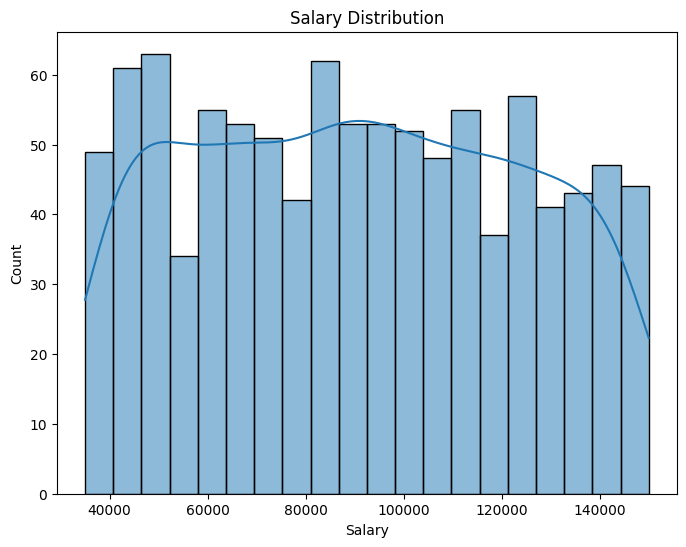

In [60]:
# Compare salaries across employees
plt.figure(figsize=(8,6))
sns.histplot(employees['Salary'],bins=20,kde=True)
plt.title("Salary Distribution")
plt.show()

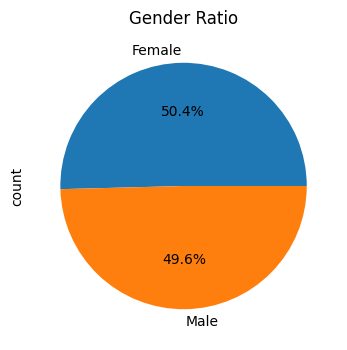

In [55]:
plt.figure(figsize=(4,4))
employees['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender Ratio")
plt.show()

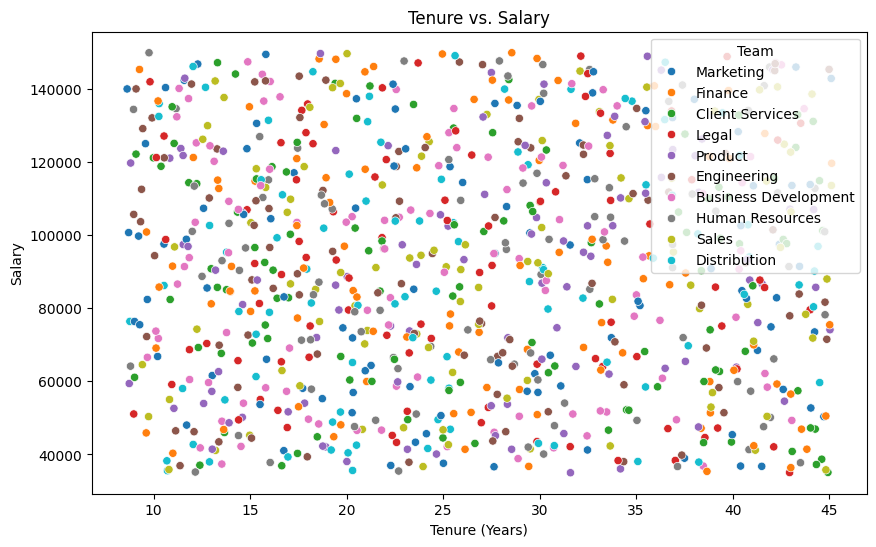

In [58]:
employees['Start Date'] = pd.to_datetime(employees['Start Date'])
employees['Tenure (Years)'] = (pd.Timestamp.now() - employees['Start Date']).dt.days / 365
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure (Years)', y='Salary', data=employees, hue='Team')
plt.title("Tenure vs. Salary")
plt.show()